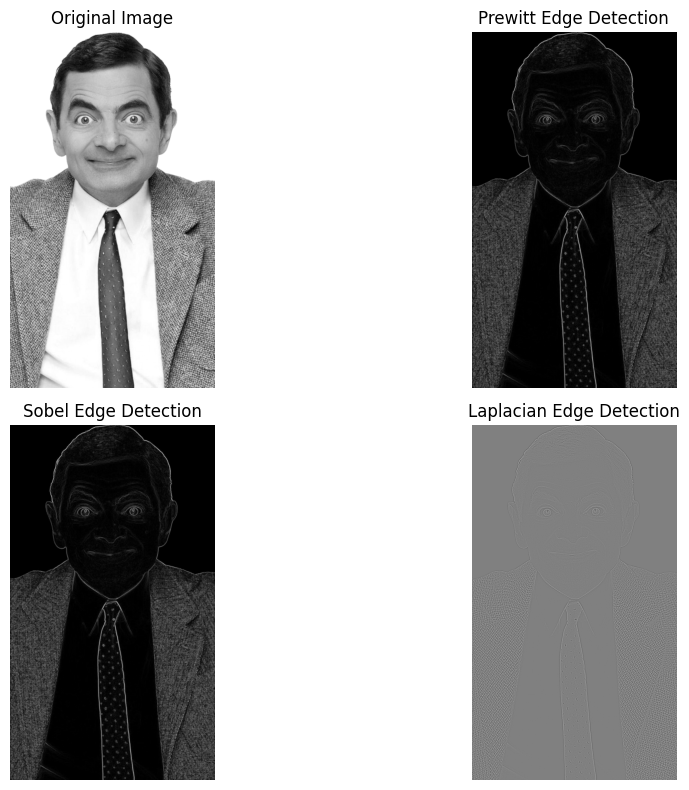

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/mr.bean.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is in float32 format for accurate calculations
image = np.float32(image)

# Apply Prewitt filter
prewitt_x = np.array([[ -1, 0, 1],
                       [ -1, 0, 1],
                       [ -1, 0, 1]], dtype=np.float32)

prewitt_y = np.array([[ 1, 1, 1],
                       [ 0, 0, 0],
                       [-1, -1, -1]], dtype=np.float32)

prewitt_edges_x = cv2.filter2D(image, -1, prewitt_x)
prewitt_edges_y = cv2.filter2D(image, -1, prewitt_y)

# Calculate magnitude and ensure it is in the correct type
prewitt_edges = cv2.magnitude(prewitt_edges_x, prewitt_edges_y)

# Apply Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Apply Laplacian filter
laplacian_edges = cv2.Laplacian(image, cv2.CV_32F)

# Normalize the results to display
prewitt_edges = cv2.normalize(prewitt_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_edges = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
laplacian_edges = cv2.normalize(laplacian_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()
